In [1]:
import re
import os
import math
import nltk
import time
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [4]:
#In this body of code, we have taken first 5000 rows of our original dataset to implement a code to test Regex, data cleaning
#Tokenization, stop words elimination - all operations on the "Bio" column of the data frame so that user profile data
#can be used in further analysis in the remaining stages. 

In [5]:
#Steps to data cleaning and preparation fort the analysis
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)
#Step 6: Regex
#Step 7: Tokenize
#Step 8: Stopwords

In [6]:
#Step 1: Go to directory, locate the excel file
#Step 2: Unicode the file , skip errors and encode 
#Step 3: Convert excel to data frame

In [7]:
import pandas as pd

df_dating = pd.read_excel (r'C:\Users\mohit\Dropbox\PhD Rutgers University\Fall 2021 Course Material\Statistical Learning for Data science\Project\Data Cleaning\test1\Input_project_v11_age.xlsx')
print (df_dating)

       age age_group  status sex orientation       body_type  \
0       22     18_22  single   m    straight  a little extra   
1       22     18_22  single   f    straight        athletic   
2       22     18_22  single   m    straight             fit   
3       20     18_22  single   f    straight         average   
4       21     18_22  single   m    straight            thin   
...    ...       ...     ...  ..         ...             ...   
10845   65       51+  single   f    straight             fit   
10846   55       51+  single   f    straight    full figured   
10847   51       51+  single   m    straight         average   
10848   65       51+  single   f    straight           curvy   
10849   60       51+  single   m    straight         average   

                    diet    drinks  drinks_freq  drugs  ...  \
0      strictly anything  socially            1  never  ...   
1                    NaN  socially            1  never  ...   
2        mostly anything  socially        

In [8]:
#The bottom line removes all emojis from the text, this will help clean the text

In [9]:
df_dating.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,nan,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",nan,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,nan,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,nan,socially,1,nan,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",nan,nan,buddhism,nan,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,65,51+,single,f,straight,fit,nan,socially,1,never,...,humanities_arts_entertainment,2011-08-19-18-51,"oakland, california",nan,nan,nan,libra but it doesn&rsquo;t matter,no,english (fluently),my friends describe me as a beautiful on the i...
10846,55,51+,single,f,straight,full figured,anything,rarely,0,never,...,business,2012-06-19-08-45,"half moon bay, california","has kids, but doesn't want more",dislikes cats,catholicism but not too serious about it,leo but it doesn&rsquo;t matter,no,english,"my friends would say i've got a caring, nurtur..."
10847,51,51+,single,m,straight,average,strictly anything,rarely,0,never,...,business,2012-06-30-06-26,"san francisco, california",has a kid,nan,atheism but not too serious about it,nan,sometimes,english,in the suburbs not by choice but necessity. i ...
10848,65,51+,single,f,straight,curvy,mostly anything,socially,1,never,...,other,2012-06-30-19-11,"san lorenzo, california",has kids,has dogs and has cats,catholicism and very serious about it,scorpio and it matters a lot,no,"english, english, french, spanish",i am fun loving and romantic. a bouquet of flo...


In [10]:
df_dating["Bio"] = df_dating["Bio"].str.lower()

In [11]:
type(df_dating)

pandas.core.frame.DataFrame

In [12]:
#Convert all the text in the bio-column to lower case
#Print first few rows of the data frame to test how column 'Bio' looks

In [13]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco....
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...","full-time student, full-time square. i change ..."
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)","""apparently,"" has become a new favorite word o..."
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,"i grew up in iowa. it gets a bad rap, but let ..."


In [14]:
#Step 4: Instruct it to read column 'V' 
#Step 5: get lower (V)

In [15]:
#df['Bio'].str.lower()
bio_token1 = pd.DataFrame(df_dating, columns = ['Bio'])
print(bio_token1[0:5])

                                                 Bio
0  about me:  i would love to think that i was so...
1  my name is ashley and i live in san francisco....
2  full-time student, full-time square. i change ...
3  "apparently," has become a new favorite word o...
4  i grew up in iowa. it gets a bad rap, but let ...


In [16]:
#Step 6: Regex

In [17]:
import nltk

df_dating['Bio'] = df_dating['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating['Bio'] = df_dating['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()


<ipython-input-17-8a85c3cb2075>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dating['Bio'] = df_dating['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
<ipython-input-17-8a85c3cb2075>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating['Bio'] = df_dating['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
<ipython-input-17-8a85c3cb2075>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating['Bio'] = df_dating['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
<ipython-input-17-8a85c3cb2075>:6: FutureWarning: The default value of regex will change from True to False in a futu

In [18]:
df_dating_top = df_dating.head()
df_dating_top

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [19]:
#Step 7: Tokenize

In [20]:
splitwords = [ nltk.word_tokenize( str(sentence) ) for sentence in df_dating["Bio"] ]

In [21]:
print(splitwords[0:5])

[['about', 'me', 'i', 'would', 'love', 'to', 'think', 'that', 'i', 'was', 'some', 'some', 'kind', 'of', 'intellectual', 'either', 'the', 'dumbest', 'smart', 'guy', 'or', 'the', 'smartest', 'dumb', 'guy', 'cant', 'say', 'i', 'can', 'tell', 'the', 'difference', 'i', 'love', 'to', 'talk', 'about', 'ideas', 'and', 'concepts', 'i', 'forge', 'odd', 'metaphors', 'instead', 'of', 'reciting', 'cliches', 'like', 'the', 'simularities', 'between', 'a', 'friend', 'of', 'mines', 'house', 'and', 'an', 'underwater', 'salt', 'mine', 'my', 'favorite', 'word', 'is', 'salt', 'by', 'the', 'way', 'weird', 'choice', 'i', 'know', 'to', 'me', 'most', 'things', 'in', 'life', 'are', 'better', 'as', 'metaphors', 'i', 'seek', 'to', 'make', 'myself', 'a', 'little', 'better', 'everyday', 'in', 'some', 'productively', 'lazy', 'way', 'got', 'tired', 'of', 'tying', 'my', 'shoes', 'considered', 'hiring', 'a', 'five', 'year', 'old', 'but', 'would', 'probably', 'have', 'to', 'tie', 'both', 'of', 'our', 'shoes', 'decided',

In [22]:
#Step 8: Stopwords

In [23]:
#Following code will help remove all stopwords (Step 8 of the workflow)

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
stop = stopwords.words("English")
df_dating['Bio'] = df_dating['Bio'].apply(lambda x: [item for item in str(x).split() if item not in stop])

In [26]:
bio_token2 = pd.DataFrame(df_dating, columns = ['Bio'])
print(bio_token2[0:5])

                                                 Bio
0  [would, love, think, kind, intellectual, eithe...
1  [name, ashley, live, san, francisco, love, dan...
2  [fulltime, student, fulltime, square, change, ...
3  [apparently, become, new, favorite, word, mine...
4  [grew, iowa, gets, bad, rap, let, first, tell,...


In [27]:
#Naive Bayes classification - Baseline model1

In [28]:
df_dating_NB = pd.read_excel (r'C:\Users\mohit\Dropbox\PhD Rutgers University\Fall 2021 Course Material\Statistical Learning for Data science\Project\Data Cleaning\test1\Input_project_v11_age.xlsx')
print (df_dating_NB)

       age age_group  status sex orientation       body_type  \
0       22     18_22  single   m    straight  a little extra   
1       22     18_22  single   f    straight        athletic   
2       22     18_22  single   m    straight             fit   
3       20     18_22  single   f    straight         average   
4       21     18_22  single   m    straight            thin   
...    ...       ...     ...  ..         ...             ...   
10845   65       51+  single   f    straight             fit   
10846   55       51+  single   f    straight    full figured   
10847   51       51+  single   m    straight         average   
10848   65       51+  single   f    straight           curvy   
10849   60       51+  single   m    straight         average   

                    diet    drinks  drinks_freq  drugs  ...  \
0      strictly anything  socially            1  never  ...   
1                    NaN  socially            1  never  ...   
2        mostly anything  socially        

In [29]:
df_dating_NB = df_dating_NB[df_dating_NB['Bio'].notna()]

In [30]:
df_dating_NB.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_dating_NB["Bio"] = df_dating_NB["Bio"].str.lower()

In [31]:
import nltk

df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()

<ipython-input-31-50d0102aca29>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
<ipython-input-31-50d0102aca29>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
<ipython-input-31-50d0102aca29>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_NB['Bio'] = df_dating_NB['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
<ipython-input-31-50d0102aca29>:6: FutureWarning: The default value of regex will change from True 

In [32]:
df_dating_top_NB = df_dating_NB.head()
df_dating_top_NB

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [33]:
#Number of rows in the dataframe
len(df_dating_NB)

10551

In [34]:
df_dating_NB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10551 entries, 0 to 10849
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10551 non-null  int64 
 1   age_group        10551 non-null  object
 2   status           10551 non-null  object
 3   sex              10551 non-null  object
 4   orientation      10551 non-null  object
 5   body_type        9875 non-null   object
 6   diet             6861 non-null   object
 7   drinks           10551 non-null  object
 8   drinks_freq      10551 non-null  int64 
 9   drugs            8444 non-null   object
 10  education        10551 non-null  object
 11  education_group  10551 non-null  object
 12  ethnicity        9832 non-null   object
 13  height           10551 non-null  int64 
 14  job              10551 non-null  object
 15  job_group        10551 non-null  object
 16  last_online      10551 non-null  object
 17  location         10551 non-null

Step 1: Read the dataframe and the labels (let's test for education) - define all education labels
Step 2: I think we don't need tokenize here for column V, just lower and Regex it for NB 
Step 3: Collect all the bios and education labels - that will become all_data and all_labels
Step 4: Split the data into training and test sets
Step 5: Apply NB model - TFIDF vectorizer 
Step 6: Pipeline for the TF-IDF method
Step 7: Fit the models on the training data, predict the target label
Step 8: Generate the confusion matrix/ heatmap plot

In [35]:
#Clean text Bio
bio_token_NB= pd.DataFrame(df_dating_NB, columns = ['Bio'])
print(bio_token_NB[0:5])

                                                 Bio
0  about me i would love to think that i was some...
1  my name is ashley and i live in san francisco ...
2  fulltime student fulltime square i change from...
3  apparently has become a new favorite word of m...
4  i grew up in iowa it gets a bad rap but let me...


In [36]:
#Apply the NB-classfication on the education column in the dataframe. 
#Let us first try to obtain all the unqiue labels for the education column. This will become the true labels for the NB model

In [37]:
all_labels_NB = df_dating_NB['education_group'].tolist()

In [38]:
print(all_labels_NB[0:10])
len(all_labels_NB)

['college_university', 'college_university', 'college_university', 'college_university', 'college_university', 'college_university', 'college_university', 'college_university', 'med_school', 'other']


10551

In [39]:
type(all_labels_NB)

list

In [40]:
#Printing all the clean data from Bio column
all_data_NB = df_dating_NB['Bio'].tolist()
print(all_data_NB[0:2])

['about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i

In [41]:
def split_data(all_data, all_labels, split_point):
    #put your code below this line
    global train_data
    global train_labels
    global test_data
    global test_labels
    split_point = int(split_point*len(all_data))
    print('The training data set @ split_point is shown below:')
    train_data = all_data[:split_point]
    print(train_data)
    print('The training labels set @ split_point is shown below:')
    train_labels = all_labels[:split_point]  
    print(train_labels)
    print('The test data set @ split_point is shown below:')
    test_data = all_data[split_point:]
    print(test_data)
    print('The test labels set @ split_point is shown below:')
    test_labels = all_labels[split_point:]
    print(test_labels)
    
    return train_data, test_data, train_labels, test_labels

In [42]:
split_data(all_data_NB, all_labels_NB, 0.80)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(['about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while 

In [43]:
len(train_data)

8440

In [44]:
type(train_data)

list

In [45]:
len(train_labels)

8440

In [46]:
len(test_data)

2111

In [47]:
len(test_labels)

2111

In [48]:
#Using the MultinomialNB module from scikit-learn package (see sample code in NaiveBayes.ipynb on 
#Canvas under Text Classification), build a model and predict the labels for the test_data.

In [49]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [50]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from tokenize import tokenize, untokenize
from io import BytesIO

In [51]:
#import math
#mylist = train_data
#train_data_NB = [x for x in mylist if x != 'nan']
#len(train_data_NB)
#print(train_data_NB[0:100])

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(train_data)
X

<8440x80090 sparse matrix of type '<class 'numpy.int64'>'
	with 1816229 stored elements in Compressed Sparse Row format>

In [53]:
# convert to a Pandas DataFrame to view the counts
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,__,___,____,_____,______,_______,________,__________,___________________________________,______________________________________,...,zymurgy,zynga,zyrtec,zyzzyva,zz,zzz,zzzzz,zzzzzim,zzzzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#get tf-idf values to represent a document as a vector of numbers
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(train_data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,__,___,____,_____,______,_______,________,__________,___________________________________,______________________________________,...,zymurgy,zynga,zyrtec,zyzzyva,zz,zzz,zzzzz,zzzzzim,zzzzzz,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# pipelines set up a sequence of transformations to be applied one after another on the data
# here the tf-idf transformation is followed by Multinomial Naive Bayes 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [56]:
# fit the model using the training data and then predict the targets/labels of test data
model.fit(train_data, train_labels)
global labels
labels = model.predict(test_data)
print(labels)
len(labels)

['college_university' 'college_university' 'college_university' ...
 'college_university' 'college_university' 'college_university']


2111

In [57]:
global set_labels
set_labels = np.unique(train_labels)
print('The number of labels (unique) from the train_data set: ')
print(set_labels)

global set_test_labels
set_test_labels = np.unique(test_labels)
print('The number of labels (unique) from the test_data set: ')
print(set_test_labels)
#Size of the confusion matrix will be determined by knowing the unique values here

The number of labels (unique) from the train_data set: 
['college_university' 'high_school' 'law_school' 'masters_ph.d'
 'med_school' 'other']
The number of labels (unique) from the test_data set: 
['college_university' 'high_school' 'law_school' 'masters_ph.d'
 'med_school' 'other']


In [58]:
x = len(set_labels)
y = len(set_test_labels)
print(x,y)

6 6


In [59]:
#Generate and display the confusion matrix of your model as a heatmap plot.

In [60]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [61]:
# PART IV: put your code after this line and run the cell to display the heatmap
# You may use multiple cells

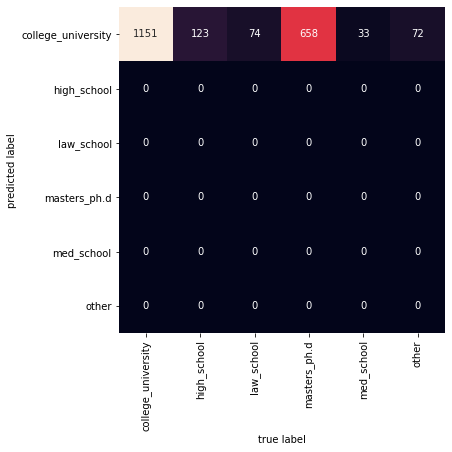

In [62]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, labels)
plt.figure(figsize=(x,y))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=set_labels, yticklabels=set_test_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [63]:
#Compute Scores
# PART V: put your code after this line and run the cell to display the scores

from sklearn.metrics import precision_score

In [64]:
#Average is assigned micro
#
precisionScore_sklearn_microavg = precision_score(test_labels, labels, average='micro')
#
# Average is assigned macro
#
precisionScore_sklearn_macroavg = precision_score(test_labels, labels, average='macro')
#
# Printing micro and macro average precision score
#
precisionScore_sklearn_microavg, precisionScore_sklearn_macroavg

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5452392231170061, 0.09087320385283436)

In [65]:
from sklearn.metrics import f1_score
f1_score(test_labels, labels, average=None)

array([0.70570202, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [66]:
f1_score(test_labels, labels, average='micro')

0.5452392231170061

In [67]:
f1_score(test_labels, labels, average='macro')

0.1176170038830983

In [68]:
f1_score(test_labels, labels, average='weighted')

0.38477642293542247